<a href="https://colab.research.google.com/github/franciscasc/Presentacion2M/blob/main/Presentaci%C3%B3n_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

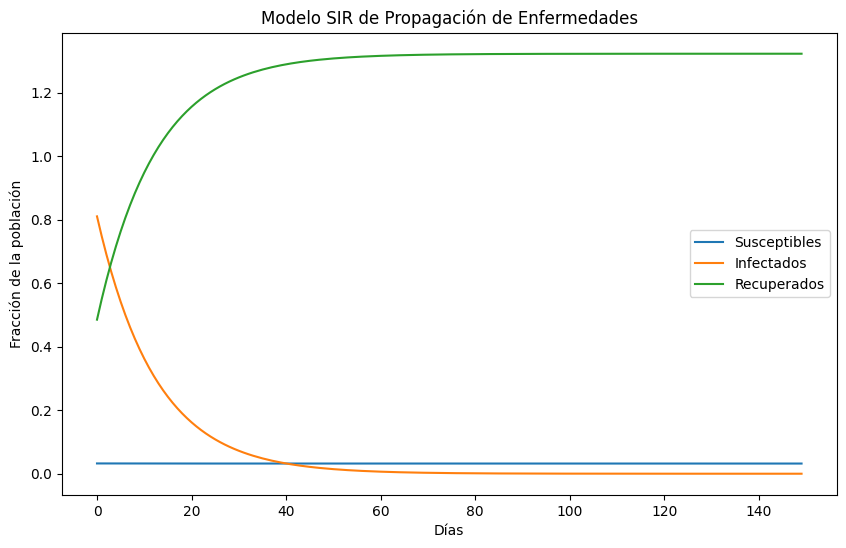

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Parámetros del modelo SIR
tasaC = 0.001  # Tasa de contacto efectivo
tasaR = 0.08  # Tasa de recuperación

# población susceptible, infectada y recuperada inicial
S0 = 0.0324
I0 = 0.8108
R0 = 0.4854

num_dias = 150
h = 1 #Tamaño del paso (intervalo de tiempo)

S = [S0]
I = [I0]
R = [R0]

#Método de Euler para simular la propagación de la enfermedad
for t in range(1, num_dias):
    # Calcular las tasas de cambio de S, I y R
    dS = -tasaC * S[-1] * I[-1] * h
    dI = (tasaR * S[-1] * I[-1] - tasaR * I[-1]) * h
    dR = tasaR * I[-1] * h

    # Actualizar los valores de S, I y R usando el método de Euler
    S.append(S[-1] + dS)
    I.append(I[-1] + dI)
    R.append(R[-1] + dR)

dias = list(range(num_dias))

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(dias, S, label='Susceptibles')
plt.plot(dias, I, label='Infectados')
plt.plot(dias, R, label='Recuperados')
plt.xlabel('Días')
plt.ylabel('Fracción de la población')
plt.legend()
plt.title('Modelo SIR de Propagación de Enfermedades')
plt.show()
#Representa un modelo hecho a escala para apróximadamente 1300 personas

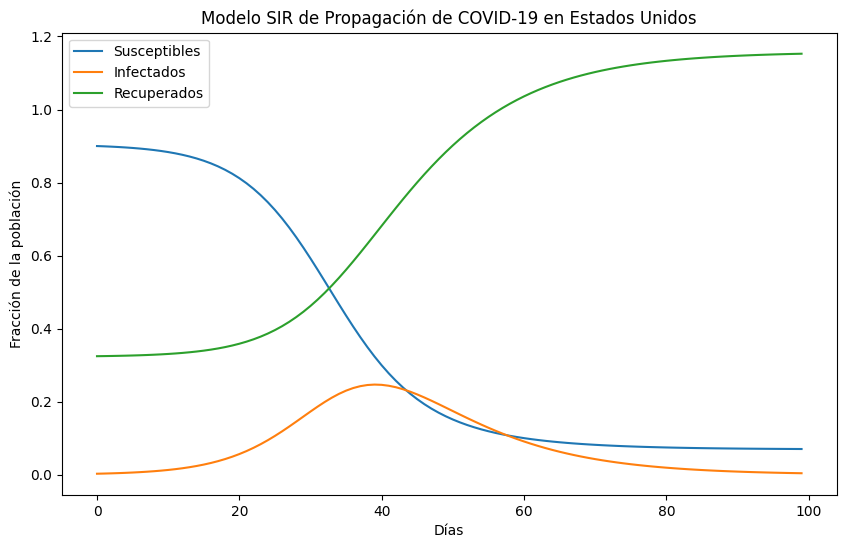

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del modelo SIR
tasaC = 0.3  # Tasa de contacto efectivo (este valor debe ser ajustado)
tasaR = 1/10  # Tasa de recuperación (inverso del tiempo promedio que una persona está infectada)

# Población susceptible, infectada y recuperada inicial
S0 = 0.9  # Este valor debe ser ajustado
I0 = 908979/329559000  # Casos activos / población total de EE.UU.
R0 = 106966776/329559000  # Recuperados / población total de EE.UU.

N = 1.0
num_dias = 100
h = 1.0  # Tamaño del paso (intervalo de tiempo)

S = [S0]
I = [I0]
R = [R0]

# Método de Euler para simular la propagación de la enfermedad
for t in range(1, num_dias):
    # Calcular las tasas de cambio de S, I y R
    dS = -tasaC * S[-1] * I[-1] * h
    dI = (tasaC * S[-1] * I[-1] - tasaR * I[-1]) * h
    dR = tasaR * I[-1] * h

    # Actualizar los valores de S, I y R usando el método de Euler
    S.append(S[-1] + dS)
    I.append(I[-1] + dI)
    R.append(R[-1] + dR)

dias = list(range(num_dias))

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(dias, S, label='Susceptibles')
plt.plot(dias, I, label='Infectados')
plt.plot(dias, R, label='Recuperados')
plt.xlabel('Días')
plt.ylabel('Fracción de la población')
plt.legend()
plt.title('Modelo SIR de Propagación de COVID-19 en Estados Unidos')
plt.show()

PARTE BASTIAN GUILLE

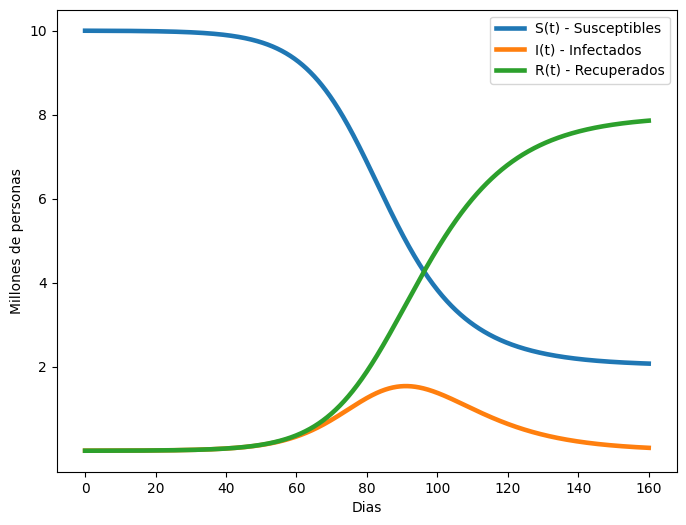

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definición del método de Euler
def km_model(init_vals, params, t):
    S_0, I_0, R_0 = init_vals
    S, I, R = [S_0], [I_0], [R_0]
    l, k = params
    deltat = t[2] - t[1]  # Pasos de tiempo constantes
    for t_ in t[:-1]:
        next_S = S[-1] - (k * S[-1] * I[-1]) * deltat
        next_I = I[-1] + (k * S[-1] * I[-1] - l * I[-1]) * deltat
        next_R = R[-1] + (l * next_I) * deltat
        S.append(next_S)
        I.append(next_I)
        R.append(next_R)
    return np.stack([S, I, R]).T

# Definición de valores iniciales y parámetros
# init_vals = [S(0), I(0), R(0)]
init_vals = [9999, 1, 0]
params = [1e-1, 0.00002]
t_max = 160  # Cambio de 150 a 160 días
deltat = 0.1
t = np.linspace(0, t_max, int(t_max / deltat))
km_results = km_model(init_vals, params, t)

# Grafica de resultados con etiquetas personalizadas en el eje y
plt.figure(figsize=(8, 6))
plt.plot(t, km_results[:, 0], label='S(t) - Susceptibles', linewidth=3.3)
plt.plot(t, km_results[:, 1], label='I(t) - Infectados', linewidth=3.3)
plt.plot(t, km_results[:, 2], label='R(t) - Recuperados', linewidth=3.3)
plt.legend()
plt.xlabel('Dias', fontsize=10)
plt.ylabel('Millones de personas', fontsize=10)

# Etiquetas personalizadas en el eje y
plt.yticks([2000, 4000, 6000, 8000, 10000], ['2', '4', '6', '8', '10'])
plt.show()

